In [15]:
import nltk

In [16]:
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [18]:
import pandas as pd

In [19]:
df=pd.read_csv("/content/sample_data/train.csv")

In [20]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [21]:
x=df.iloc[0,1]

In [22]:
import re

In [23]:
df['text'] = df['text'].dropna()  # Drop NaN values
df['text'] = df['text'].astype(str)  # Convert everything to string

In [24]:
#data cleaning

# Remove special characters and punctuation using regex
mydata=[] #empty list
for i in df['text']:
  text = re.sub(r',','',i)
  cleaned_text = re.sub(r'[^\w\s]', '', text)  # Removes everything except word characters and spaces
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Replaces multiple spaces with a single space
  cleaned_data = cleaned_text.strip()  # Removes leading/trailing whitespace
  mydata.append(cleaned_data)

In [25]:
mydata

['Id have responded if I were going',
 'Sooo SAD I will miss you here in San Diego',
 'my boss is bullying me',
 'what interview leave me alone',
 'Sons of why couldnt they put them on the releases we already bought',
 'httpwwwdothebouncycomsmf some shameless plugging for the best Rangers forum on earth',
 '2am feedings for the baby are fun when he is all smiles and coos',
 'Soooo high',
 'Both of you',
 'Journey Wow u just became cooler hehe is that possible',
 'as much as i love to be hopeful i reckon the chances are minimal P im never gonna get my cake and stuff',
 'I really really like the song Love Story by Taylor Swift',
 'My Sharpie is running DANGERously low on ink',
 'i want to go to music tonight but i lost my voice',
 'test test from the LG enV2',
 'Uh oh I am sunburned',
 'Sok trying to plot alternatives as we speak sigh',
 'ive been sick for the past few days and thus my hair looks wierd if i didnt have a hat on it would look httptinyurlcommnf4kw',
 'is back home now gonna

In [26]:
from nltk.tokenize import word_tokenize

In [27]:

tokens=[word_tokenize(x) for x in df['text']]


In [28]:
tokens[10]

['as',
 'much',
 'as',
 'i',
 'love',
 'to',
 'be',
 'hopeful',
 ',',
 'i',
 'reckon',
 'the',
 'chances',
 'are',
 'minimal',
 '=P',
 'i',
 '`',
 'm',
 'never',
 'gon',
 'na',
 'get',
 'my',
 'cake',
 'and',
 'stuff']

In [29]:
#to remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
stop = stopwords.words('english')

In [31]:
stop_token=[]
for x in tokens:
  cl = [i for i in x if i not in stop]
  stop_token.append(cl)

In [32]:
stop_token

[['I', '`', 'responded', ',', 'I', 'going'],
 ['Sooo', 'SAD', 'I', 'miss', 'San', 'Diego', '!', '!', '!'],
 ['boss', 'bullying', '...'],
 ['interview', '!', 'leave', 'alone'],
 ['Sons',
  '*',
  '*',
  '*',
  '*',
  ',',
  '`',
  'put',
  'releases',
  'already',
  'bought'],
 ['http',
  ':',
  '//www.dothebouncy.com/smf',
  '-',
  'shameless',
  'plugging',
  'best',
  'Rangers',
  'forum',
  'earth'],
 ['2am', 'feedings', 'baby', 'fun', 'smiles', 'coos'],
 ['Soooo', 'high'],
 ['Both'],
 ['Journey',
  '!',
  '?',
  'Wow',
  '...',
  'u',
  'became',
  'cooler',
  '.',
  'hehe',
  '...',
  '(',
  'possible',
  '!',
  '?',
  ')'],
 ['much',
  'love',
  'hopeful',
  ',',
  'reckon',
  'chances',
  'minimal',
  '=P',
  '`',
  'never',
  'gon',
  'na',
  'get',
  'cake',
  'stuff'],
 ['I', 'really', 'really', 'like', 'song', 'Love', 'Story', 'Taylor', 'Swift'],
 ['My', 'Sharpie', 'running', 'DANGERously', 'low', 'ink'],
 ['want', 'go', 'music', 'tonight', 'lost', 'voice', '.'],
 ['test', '

In [33]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [34]:
stemedata =[]
for message in stop_token:
  st = [ps.stem(word) for word in message]
  stemedata.append(st)

In [35]:
stemedata

[['i', '`', 'respond', ',', 'i', 'go'],
 ['sooo', 'sad', 'i', 'miss', 'san', 'diego', '!', '!', '!'],
 ['boss', 'bulli', '...'],
 ['interview', '!', 'leav', 'alon'],
 ['son', '*', '*', '*', '*', ',', '`', 'put', 'releas', 'alreadi', 'bought'],
 ['http',
  ':',
  '//www.dothebouncy.com/smf',
  '-',
  'shameless',
  'plug',
  'best',
  'ranger',
  'forum',
  'earth'],
 ['2am', 'feed', 'babi', 'fun', 'smile', 'coo'],
 ['soooo', 'high'],
 ['both'],
 ['journey',
  '!',
  '?',
  'wow',
  '...',
  'u',
  'becam',
  'cooler',
  '.',
  'hehe',
  '...',
  '(',
  'possibl',
  '!',
  '?',
  ')'],
 ['much',
  'love',
  'hope',
  ',',
  'reckon',
  'chanc',
  'minim',
  '=p',
  '`',
  'never',
  'gon',
  'na',
  'get',
  'cake',
  'stuff'],
 ['i', 'realli', 'realli', 'like', 'song', 'love', 'stori', 'taylor', 'swift'],
 ['my', 'sharpi', 'run', 'danger', 'low', 'ink'],
 ['want', 'go', 'music', 'tonight', 'lost', 'voic', '.'],
 ['test', 'test', 'lg', 'env2'],
 ['uh', 'oh', ',', 'i', 'sunburn'],
 ['s',

In [36]:
#apply pos_tagging on data
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [37]:
pos_token=[pos_tag(message) for message in stop_token]

In [38]:
pos_token

[[('I', 'PRP'),
  ('`', '``'),
  ('responded', 'VBD'),
  (',', ','),
  ('I', 'PRP'),
  ('going', 'VBG')],
 [('Sooo', 'NNP'),
  ('SAD', 'NNP'),
  ('I', 'PRP'),
  ('miss', 'VBP'),
  ('San', 'NNP'),
  ('Diego', 'NNP'),
  ('!', '.'),
  ('!', '.'),
  ('!', '.')],
 [('boss', 'IN'), ('bullying', 'NN'), ('...', ':')],
 [('interview', 'NN'), ('!', '.'), ('leave', 'VB'), ('alone', 'RB')],
 [('Sons', 'NNS'),
  ('*', 'VBP'),
  ('*', 'JJ'),
  ('*', 'NNP'),
  ('*', 'NNP'),
  (',', ','),
  ('`', '``'),
  ('put', 'VB'),
  ('releases', 'NNS'),
  ('already', 'RB'),
  ('bought', 'VBD')],
 [('http', 'NN'),
  (':', ':'),
  ('//www.dothebouncy.com/smf', 'JJ'),
  ('-', ':'),
  ('shameless', 'NN'),
  ('plugging', 'VBG'),
  ('best', 'JJS'),
  ('Rangers', 'NNPS'),
  ('forum', 'VBP'),
  ('earth', 'NN')],
 [('2am', 'CD'),
  ('feedings', 'NNS'),
  ('baby', 'NN'),
  ('fun', 'NN'),
  ('smiles', 'NNS'),
  ('coos', 'VBP')],
 [('Soooo', 'NNP'), ('high', 'JJ')],
 [('Both', 'DT')],
 [('Journey', 'NN'),
  ('!', '.'),
  ('

In [39]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [40]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to NOUN if POS tag is unknown


In [41]:
pos_token[0][0]

('I', 'PRP')

In [42]:
get_wordnet_pos(pos_token[0][0][1])

'n'

In [43]:
lem_data = []
for x in range(len(pos_token)):
  lem = [lemmatizer.lemmatize(pos_token[x][i][0],get_wordnet_pos(pos_token[x][i][1])) for i in range(len(pos_token[x]))]
  lem_data.append(lem)

In [44]:
lem_data

[['I', '`', 'respond', ',', 'I', 'go'],
 ['Sooo', 'SAD', 'I', 'miss', 'San', 'Diego', '!', '!', '!'],
 ['bos', 'bullying', '...'],
 ['interview', '!', 'leave', 'alone'],
 ['Sons', '*', '*', '*', '*', ',', '`', 'put', 'release', 'already', 'buy'],
 ['http',
  ':',
  '//www.dothebouncy.com/smf',
  '-',
  'shameless',
  'plug',
  'best',
  'Rangers',
  'forum',
  'earth'],
 ['2am', 'feeding', 'baby', 'fun', 'smile', 'coo'],
 ['Soooo', 'high'],
 ['Both'],
 ['Journey',
  '!',
  '?',
  'Wow',
  '...',
  'u',
  'become',
  'cooler',
  '.',
  'hehe',
  '...',
  '(',
  'possible',
  '!',
  '?',
  ')'],
 ['much',
  'love',
  'hopeful',
  ',',
  'reckon',
  'chance',
  'minimal',
  '=P',
  '`',
  'never',
  'gon',
  'na',
  'get',
  'cake',
  'stuff'],
 ['I', 'really', 'really', 'like', 'song', 'Love', 'Story', 'Taylor', 'Swift'],
 ['My', 'Sharpie', 'run', 'DANGERously', 'low', 'ink'],
 ['want', 'go', 'music', 'tonight', 'lose', 'voice', '.'],
 ['test', 'test', 'LG', 'enV2'],
 ['Uh', 'oh', ',', '

In [45]:
stem_vec=[' '.join(message) for message in stemedata]

In [46]:
stem_vec

['i ` respond , i go',
 'sooo sad i miss san diego ! ! !',
 'boss bulli ...',
 'interview ! leav alon',
 'son * * * * , ` put releas alreadi bought',
 'http : //www.dothebouncy.com/smf - shameless plug best ranger forum earth',
 '2am feed babi fun smile coo',
 'soooo high',
 'both',
 'journey ! ? wow ... u becam cooler . hehe ... ( possibl ! ? )',
 'much love hope , reckon chanc minim =p ` never gon na get cake stuff',
 'i realli realli like song love stori taylor swift',
 'my sharpi run danger low ink',
 'want go music tonight lost voic .',
 'test test lg env2',
 'uh oh , i sunburn',
 's ` ok , tri plot altern speak * sigh *',
 '` sick past day thu , hair look wierd . didnt hat would look ... http : //tinyurl.com/mnf4kw',
 'back home gon na miss everi one',
 'he',
 'oh marli , i ` sorri ! ! i hope find soon ! ! < 3 < 3',
 'play ghost onlin realli interest . the new updat kirin pet metamorph third job . can ` wait dragon pet',
 'clean hous famili com later today ..',
 'got ta restart c

In [47]:
#applying count vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [48]:
x=cv.fit_transform(stem_vec).toarray()

In [49]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
y = df['sentiment']

In [51]:
#importing multinomialnb from sklearn(naive_bayes)
from sklearn.naive_bayes import MultinomialNB


In [52]:
mb=MultinomialNB()

In [53]:
mb.fit(x,y)

MultinomialNB()

In [54]:
df['text'][3]

' what interview! leave me alone'

In [55]:
x[3]

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
mb.predict([x[3]])

array(['negative'], dtype='<U8')

In [57]:
[mb.predict([x[i]]) for i in range(len(x))]

[array(['neutral'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['positive'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['positive'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['positive'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['positive'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['positive'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['neutral'], dtype='<U8'),
 array(['positive'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['negative'], dtype='<U8'),
 array(['positive'], dtype='<U8'

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

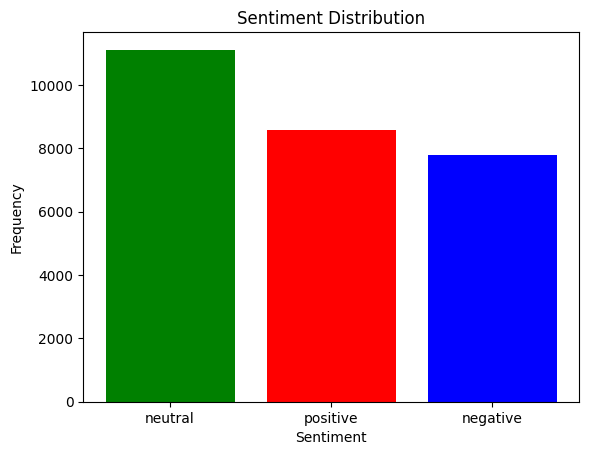

In [59]:
# Plot sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


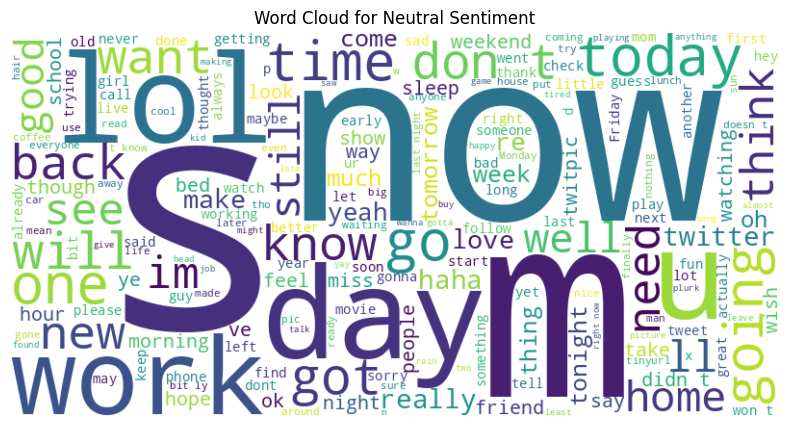

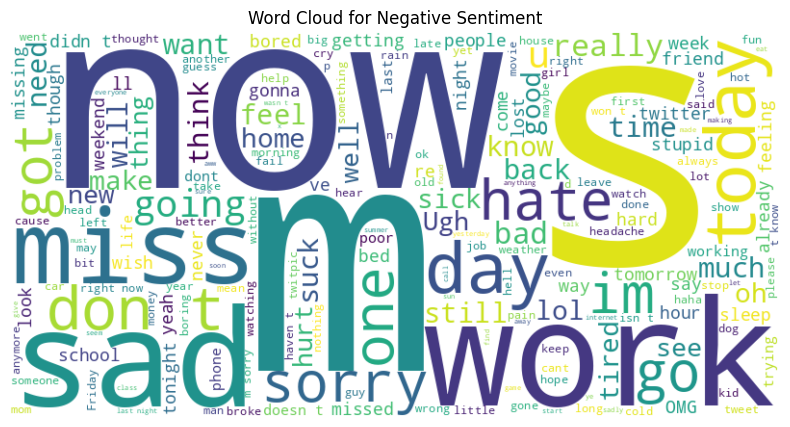

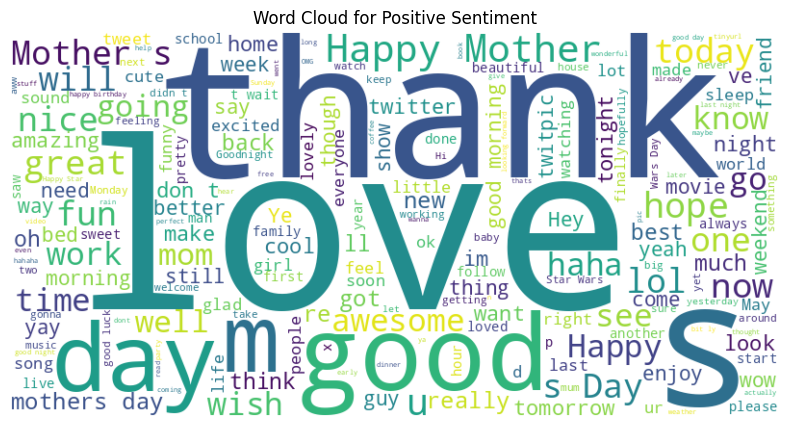

In [60]:
for sentiment in df['sentiment'].unique():
    text_data = " ".join(df[df['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment.capitalize()} Sentiment")
    plt.axis("off")
    plt.show()